In [571]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

import seaborn as sbn

### I - Loan Dataset

In [572]:
#Read the dataset 
loanData = pd.read_csv("loan.csv",low_memory=False)

# DtypeWarning: One of the column have mixed types.Hence set low_memory=False.


In [ ]:
# Inspecting Data
loanData.head()

In [573]:
# View Summary of the DataFrame.
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


 ### 2 -Data Handling and Cleaning

#### Data Quality Issues 
 - Column 47 seems to be containing data of multiple dtype
 - At least 24 columns , seems to be of object type.
 - Multiple columns seems to have all null values.


#### Treating Missing Values

In [574]:
# Find the column names with all null values , so that we can discrad them off for analysis
loanData.columns[loanData.isnull().all()].tolist() 

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [575]:
#Droping columns with all null values
loanData.dropna(axis=1,how='all',inplace=True)

In [576]:
#Check again the rows with values which are less represented 
loanData.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              


- Since Employer Title replaces Employer Name for all loans listed after 9/23/2013,Hence it contains inconsistant info. So, we will fill some default value for missing values.
- There will be no use if we fill missing values in emp_length column based on some calculation, hence we will drop respective rows

In [577]:
# Discrading rows containing emp_length as null
loanData=loanData[~loanData.emp_length.isnull()]

In [578]:
# Check the value of emp_length where emp_title is missing
loanData['emp_length'][loanData['emp_title'].isnull()].value_counts()

< 1 year     382
10+ years    344
2 years      115
3 years      113
1 year       106
5 years      105
4 years       79
6 years       71
7 years       51
8 years       44
9 years       30
Name: emp_length, dtype: int64

- Since emp_length is greater than 0 for missing emp_title, we can assume that these borrowers run their own small business or similar. Let's check if such title already exists for such borrowers. 

In [579]:
# Let's check the purpose of loan for null values in emp_title
loanData['purpose'][loanData['emp_title'].isnull()].value_counts()

debt_consolidation    452
small_business        314
credit_card           179
other                 142
home_improvement      122
major_purchase         78
car                    36
medical                23
wedding                23
moving                 19
house                  18
educational            18
vacation               10
renewable_energy        6
Name: purpose, dtype: int64

In [580]:
# Let's confirm we have "Self Employed" title to represent self owned business.
loanData['emp_title'][loanData['emp_title']=="Self Employed"]

12181    Self Employed
12298    Self Employed
14943    Self Employed
19003    Self Employed
19221    Self Employed
24145    Self Employed
25080    Self Employed
26263    Self Employed
28191    Self Employed
34780    Self Employed
34829    Self Employed
35000    Self Employed
35174    Self Employed
35485    Self Employed
35496    Self Employed
35679    Self Employed
35887    Self Employed
36169    Self Employed
36834    Self Employed
36865    Self Employed
36884    Self Employed
36899    Self Employed
37049    Self Employed
37072    Self Employed
37112    Self Employed
37125    Self Employed
37345    Self Employed
37483    Self Employed
38129    Self Employed
38172    Self Employed
38264    Self Employed
38698    Self Employed
38785    Self Employed
38897    Self Employed
39015    Self Employed
39039    Self Employed
39125    Self Employed
39159    Self Employed
39454    Self Employed
39529    Self Employed
Name: emp_title, dtype: object

In [581]:
# Fill null value with Self Employed
loanData['emp_title']=loanData['emp_title'].apply(lambda x: "Self Employed" if pd.isnull(x) else x)

loanData['emp_title']

0                     Self Employed
1                             Ryder
2                     Self Employed
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                 Self Employed
39715                 Self Employed
39716              Evergreen Center
Name: emp_title, Length: 38642, dtype: object

In [582]:
# let's clean emp_length column by replacing < 1to 0 and 10+ to 11
loanData['emp_length']=loanData['emp_length'].apply(lambda x: 0 if "<" in x else 11 if "+" in x else x.split(' ')[0] )
loanData['emp_length'].value_counts()


11    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [583]:
#Check again the rows with values which are less represented 
loanData.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12495
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [584]:
loanData.revol_util.value_counts()

0%        941
0.20%      62
63%        61
66.70%     57
40.70%     57
         ... 
0.83%       1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1087, dtype: int64

- Since 'revol_util' have lots of distinct values , we can't fill null with other value. Hence we will drop the rows having null values .

In [585]:
# Discrading rows containing revol_util as null
loanData=loanData[~loanData.revol_util.isnull()]

In [586]:
# Clean the int_rate column and convert this to float
loanData.revol_util= loanData.revol_util.apply(lambda x: x.replace("%","")).astype("float")
loanData.revol_util

0        83.7
1         9.4
2        98.5
3        21.0
4        53.9
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 38595, dtype: float64

- Let's fill missing values for pub_rec_bankruptcies

In [587]:
# Check the values of pub_rec_bankruptcies column
loanData.pub_rec_bankruptcies.value_counts()

0.0    36329
1.0     1562
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [588]:
# Let's fill null value of the pub_rec_bankruptcies with most occurring value 0.0
loanData['pub_rec_bankruptcies']=loanData['pub_rec_bankruptcies'].apply(lambda x: 0 if pd.isnull(x) else x)

loanData['pub_rec_bankruptcies']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 38595, dtype: float64

In [589]:
# Check the values of term coulmn
loanData.term.value_counts()

 36 months    28243
 60 months    10352
Name: term, dtype: int64

In [590]:
# Clean the term column and convert this to float
loanData.term= loanData.term.apply(lambda x: x.split(" ")[1]).astype("float")
loanData.term

0        36.0
1        60.0
2        36.0
3        36.0
4        60.0
         ... 
39712    36.0
39713    36.0
39714    36.0
39715    36.0
39716    36.0
Name: term, Length: 38595, dtype: float64

In [ ]:
# Check interest rate type
loanData.int_rate.value_counts()

In [591]:
# Clean the int_rate column and convert this to float
loanData.int_rate= loanData.int_rate.apply(lambda x: x.replace("%","")).astype("float")
loanData.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38595, dtype: float64

In [592]:
# Dropping all rows with loan status as current , because we don't know their tendancy to default.
loanData=loanData[loanData['loan_status']!="Current"]
loanData

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36.0,10.65,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60.0,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36.0,15.96,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36.0,13.49,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36.0,7.90,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36.0,8.07,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,0.0,NaN
39713,90665,90607,8500,8500,875.0,36.0,10.28,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,0.0,NaN
39714,90395,90390,5000,5000,1325.0,36.0,8.07,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,0.0,NaN
39715,90376,89243,5000,5000,650.0,36.0,7.43,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,0.0,NaN


In [593]:
loanData['last_credit_pull_d'].value_counts()

May-16    9116
Apr-16    2329
Mar-16    1093
Feb-13     831
Feb-16     712
          ... 
May-07       1
Jun-08       1
Jul-08       1
May-08       1
Jul-07       1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [594]:
#Droping riws with missing value
laonData=loanData[~loanData['last_credit_pull_d'].isna()]

#### Treating insignificant columns

- The column 'desc' contains lots of null values and seems not useful as we already have separate column 'Purpose'. Similarly  'title' is also not useful .

- The columns 'url','id','member_id' etc, are also not useful in depicting the behaviour of being default.

- Since 'funded_amnt' and 'funded_amnt_inv' are what ultimately at stake from FC, we are not bothered about 'loan_amnt'.


- Hence we will drop all insignificant columns



In [595]:
#Droping insignificant columns.
loanData.drop(columns = ['desc','title','url','id','member_id','loan_amnt'],inplace=True)
loanData.columns

Index(['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [596]:
#Check again the rows with values which are less represented 
loanData.isna().sum()

funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        24172
mths_since_last_record        34878
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                  

#### Treating Columns with majority of null or partial values

- The columns 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_delinq' , and 'mths_since_last_record' more than half(50%) of values as null.

In [597]:
#Droping columns with majorly null values.
loanData.drop(columns = ['mths_since_last_record','next_pymnt_d','mths_since_last_delinq'],inplace=True)
loanData.columns

Index(['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [598]:
#Check values of zip code
loanData.zip_code.value_counts()

100xx    576
945xx    518
112xx    494
606xx    486
070xx    449
        ... 
090xx      1
677xx      1
353xx      1
556xx      1
469xx      1
Name: zip_code, Length: 821, dtype: int64

- Partial values of Zip codes available, hence we will drop this cloumn

In [599]:
#Droping columns with majorly null values.
loanData.drop(columns = ['zip_code'],inplace=True)
loanData.columns

Index(['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### Treating Single valued Columns

In [600]:
# Check the values of pymnt_plan column
loanData.pymnt_plan.value_counts()

n    37497
Name: pymnt_plan, dtype: int64

In [601]:
# Check the values of collections_12_mths_ex_med column
loanData.collections_12_mths_ex_med.value_counts()

0.0    37441
Name: collections_12_mths_ex_med, dtype: int64

In [602]:
# Check the values of pub_rec_bankruptcies column
loanData.chargeoff_within_12_mths.value_counts()

0.0    37441
Name: chargeoff_within_12_mths, dtype: int64

In [603]:
# Check the values of tax_liens column
loanData.tax_liens.value_counts() 

0.0    37458
Name: tax_liens, dtype: int64

In [604]:
#Check the values of acc_now_delinq column
loanData.acc_now_delinq.value_counts() 

0    37497
Name: acc_now_delinq, dtype: int64

In [605]:
#Check the values of initial_list_status column
loanData.initial_list_status.value_counts() 

f    37497
Name: initial_list_status, dtype: int64

In [606]:
#Check the values of policy_code column
loanData.policy_code.value_counts() 

1    37497
Name: policy_code, dtype: int64

In [607]:
#Check the values of delinq_amnt column
loanData.delinq_amnt.value_counts() 

0    37497
Name: delinq_amnt, dtype: int64

In [608]:
#Check the values of application_type column
loanData.application_type.value_counts() 

INDIVIDUAL    37497
Name: application_type, dtype: int64


- As all values for above columns are equal to 0 or n or single valued, these columns do not seem useful. So we can drop these from Dataframe

In [609]:
#Droping columns with 0 or n or single values.
loanData.drop(columns = ['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','pymnt_plan','acc_now_delinq','initial_list_status','policy_code','delinq_amnt','application_type'],inplace=True)
loanData.columns

Index(['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [610]:
# Let's drop few more columns, which represents data which we get post loan approval. 
loanData.drop(columns = ['inq_last_6mths','delinq_2yrs','revol_bal','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_d','last_credit_pull_d','collection_recovery_fee','recoveries','total_rec_late_fee','last_pymnt_amnt','last_credit_pull_d'],inplace=True)
loanData.columns

Index(['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

 #### - Standarizing Data and Deriving Metrics


In [611]:
loanData.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36.0,10.65,162.87,B,B2,Self Employed,11,RENT,...,Fully Paid,credit_card,AZ,27.65,Jan-85,3,0,83.7,9,0.0
1,2500,2500.0,60.0,15.27,59.83,C,C4,Ryder,0,RENT,...,Charged Off,car,GA,1.00,Apr-99,3,0,9.4,4,0.0
2,2400,2400.0,36.0,15.96,84.33,C,C5,Self Employed,11,RENT,...,Fully Paid,small_business,IL,8.72,Nov-01,2,0,98.5,10,0.0
3,10000,10000.0,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,11,RENT,...,Fully Paid,other,CA,20.00,Feb-96,10,0,21.0,37,0.0
5,5000,5000.0,36.0,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,...,Fully Paid,wedding,AZ,11.20,Nov-04,9,0,28.3,12,0.0


In [612]:
#checking values of issue_d
loanData.issue_d.value_counts()

Dec-11    1994
Nov-11    1970
Oct-11    1862
Sep-11    1837
Aug-11    1751
Jun-11    1674
Jul-11    1672
May-11    1554
Apr-11    1505
Mar-11    1400
Jan-11    1336
Feb-11    1239
Dec-10    1219
Nov-10    1096
Jul-10    1091
Oct-10    1083
Sep-10    1057
Aug-10    1055
Jun-10     991
May-10     894
Apr-10     806
Mar-10     717
Feb-10     604
Nov-09     601
Dec-09     596
Jan-10     583
Oct-09     544
Sep-09     449
Aug-09     408
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Mar-08     232
Dec-08     222
Nov-08     183
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      82
May-08      71
Aug-08      70
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [613]:
#Deriving  2 columns issue_Month and issue_Year based on issue_d
loanData['issue_Month']  = loanData['issue_d'].apply(lambda date:date.split('-')[0])
loanData['issue_Year'] = loanData['issue_d'].apply(lambda date:date.split('-')[1])
loanData[['issue_d','issue_Month','issue_Year']].head()

,issue_d,issue_Month,issue_Year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
5,Dec-11,Dec,11


In [614]:
#Deriving new column loan_amnt_balance for getting the difference of funded_amnt and funded_amnt_inv
loanData['loan_amnt_balance']=round(loanData['funded_amnt']-loanData['funded_amnt_inv'],2)
loanData[['loan_amnt_balance','funded_amnt','funded_amnt_inv']].head()

,loan_amnt_balance,funded_amnt,funded_amnt_inv
0,25.0,5000,4975.0
1,0.0,2500,2500.0
2,0.0,2400,2400.0
3,0.0,10000,10000.0
5,0.0,5000,5000.0


In [615]:
#Let's Round off the value of int_rate
loanData.int_rate= round(loanData.int_rate,2)
loanData.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 37497, dtype: float64

In [616]:
# calculate ratio of funded_amnt and annual_inc
loanData['loanVsIncomeRatio']=round(loanData['funded_amnt']/loanData['annual_inc'],2)
loanData[['loanVsIncomeRatio','funded_amnt','annual_inc']].head()

,loanVsIncomeRatio,funded_amnt,annual_inc
0,0.21,5000,24000.0
1,0.08,2500,30000.0
2,0.20,2400,12252.0
3,0.20,10000,49200.0
5,0.14,5000,36000.0


In [619]:
# Added new column to store value of loan status in binary form.
loanData['Default']=loanData["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

In [620]:
# Checking how the final data look like
loanData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37497 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt           37497 non-null  int64  
 1   funded_amnt_inv       37497 non-null  float64
 2   term                  37497 non-null  float64
 3   int_rate              37497 non-null  float64
 4   installment           37497 non-null  float64
 5   grade                 37497 non-null  object 
 6   sub_grade             37497 non-null  object 
 7   emp_title             37497 non-null  object 
 8   emp_length            37497 non-null  object 
 9   home_ownership        37497 non-null  object 
 10  annual_inc            37497 non-null  float64
 11  verification_status   37497 non-null  object 
 12  issue_d               37497 non-null  object 
 13  loan_status           37497 non-null  object 
 14  purpose               37497 non-null  object 
 15  addr_state         

 ### 3 - Data Visualizing , Treating outliers and Analysis

#### Treating Outliers

- Let's check outliers for the consumer numeric  Variables  : annual_inc, open_acc, total_acc

In [621]:
loanData.annual_inc.describe()

count    3.749700e+04
mean     6.943653e+04
std      6.467208e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

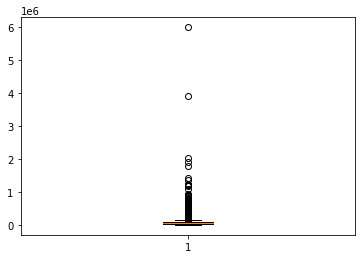

In [622]:
# Check outliers for annual_inc
plt.boxplot(loanData.annual_inc)
plt.show()

In [623]:
#Remove outlier beyond 75 percentile for annual_inc
loanData['annual_inc'].value_counts()
Q3 = loanData['annual_inc'].quantile(0.75)

loanData=loanData[loanData['annual_inc'] <= Q3]

count    28157.000000
mean     50123.353776
std      17110.586827
min       4000.000000
25%      37000.000000
50%      50000.000000
75%      63600.000000
max      83000.000000
Name: annual_inc, dtype: float64

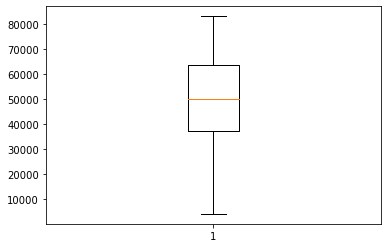

In [624]:
#Checking again the distribution of annaul income.
plt.boxplot(loanData['annual_inc'])
loanData['annual_inc'].describe()

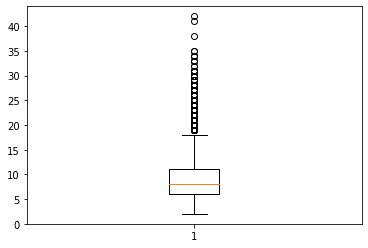

count    28157.000000
mean         8.797741
std          4.214163
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         42.000000
Name: open_acc, dtype: float64

In [625]:
# Check outliers for open_acc
plt.boxplot(loanData.open_acc)
plt.show()
loanData.open_acc.describe()

In [626]:
#Remove outlier beyond 75 percentile for open_acc
loanData['open_acc'].value_counts()
Q3 = loanData['open_acc'].quantile(0.75)

loanData=loanData[loanData['open_acc'] <= Q3]

count    21868.000000
mean         7.021858
std          2.394579
min          2.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         11.000000
Name: open_acc, dtype: float64

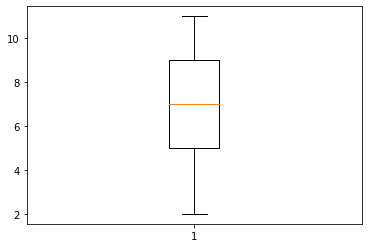

In [627]:
#Checking again the distribution of open_acc.
plt.boxplot(loanData['open_acc'])
loanData['open_acc'].describe()

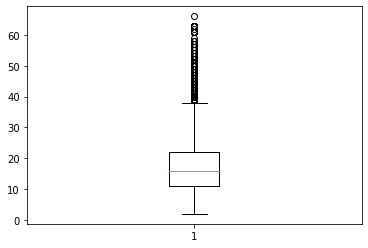

count    21868.000000
mean        17.159640
std          8.619622
min          2.000000
25%         11.000000
50%         16.000000
75%         22.000000
max         66.000000
Name: total_acc, dtype: float64

In [628]:
# Check outliers for total_acc
plt.boxplot(loanData.total_acc)
plt.show()
loanData.total_acc.describe()

In [629]:
#Remove outlier beyond 75 percentile for total_acc
loanData['total_acc'].value_counts()
Q3 = loanData['total_acc'].quantile(0.75)

loanData=loanData[loanData['total_acc'] <= Q3]

count    16636.000000
mean        13.346177
std          4.974666
min          2.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         22.000000
Name: total_acc, dtype: float64

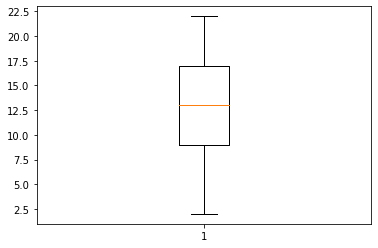

In [630]:
#Checking again the distribution of total_acc.
plt.boxplot(loanData['total_acc'])
loanData['total_acc'].describe()

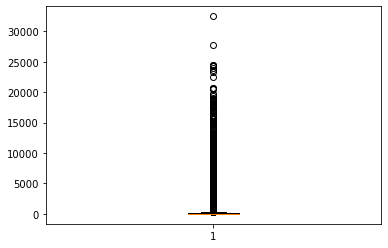

count    16636.000000
mean       457.894469
std       1786.478515
min          0.000000
25%          0.000000
50%          0.000000
75%        100.000000
max      32475.000000
Name: loan_amnt_balance, dtype: float64

In [631]:
# Check outliers for loan_amnt_balance
plt.boxplot(loanData.loan_amnt_balance)
plt.show()
loanData.loan_amnt_balance.describe()

In [632]:
#Remove outlier beyond 75 percentile for loan_amnt_balance
loanData['loan_amnt_balance'].value_counts()
Q3 = loanData['loan_amnt_balance'].quantile(0.75)

loanDataSub=loanData[loanData['loan_amnt_balance'] <= Q3]

In [633]:
#This is how our data looks now
loanData.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_Month,issue_Year,loan_amnt_balance,loanVsIncomeRatio,Default
0,5000,4975.0,36.0,10.65,162.87,B,B2,Self Employed,11,RENT,...,3,0,83.7,9,0.0,Dec,11,25.0,0.21,0
1,2500,2500.0,60.0,15.27,59.83,C,C4,Ryder,0,RENT,...,3,0,9.4,4,0.0,Dec,11,0.0,0.08,1
2,2400,2400.0,36.0,15.96,84.33,C,C5,Self Employed,11,RENT,...,2,0,98.5,10,0.0,Dec,11,0.0,0.20,0
5,5000,5000.0,36.0,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,...,9,0,28.3,12,0.0,Dec,11,0.0,0.14,0
6,7000,7000.0,60.0,15.96,170.08,C,C5,Southern Star Photography,8,RENT,...,7,0,85.6,11,0.0,Dec,11,0.0,0.15,0


count    12572.000000
mean        13.222001
std          5.000639
min          2.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         22.000000
Name: total_acc, dtype: float64

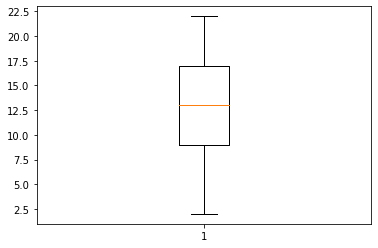

In [634]:
#Checking again the distribution of total_acc.
plt.boxplot(loanDataSub['total_acc'])
loanDataSub['total_acc'].describe()

### Univariate Analysis

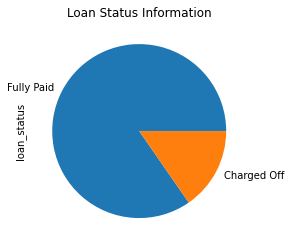

In [635]:
#Plot a pie chart to see the laon status distribution
loanData['loan_status'].value_counts().plot.pie()
plt.title('Loan Status Information')
plt.show()

- Above pie chart shows that

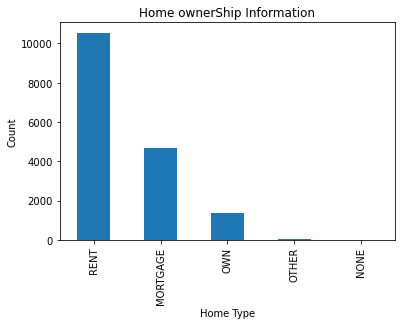

In [636]:
#Plot a bar chart to see the distribution of home ownership
loanData['home_ownership'].value_counts().plot.bar()
plt.title('Home ownerShip Information')
plt.ylabel("Count")
plt.xlabel("Home Type")
plt.show()


- We see that majority of loan borrowers don't own a house.
- Majority of laon Borrowers have rented a house.
- We can see it as a prospective borrower, who don't own house.

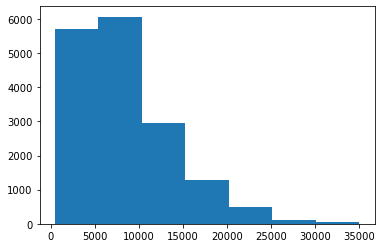

In [637]:
#Binning for funded_amt
plt.hist(loanData.funded_amnt,bins=7)
plt.show()

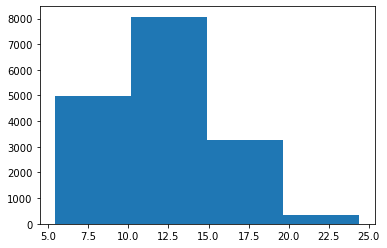

In [638]:
#Binning for int_rate
plt.hist(loanData.int_rate,bins=4)
plt.show()

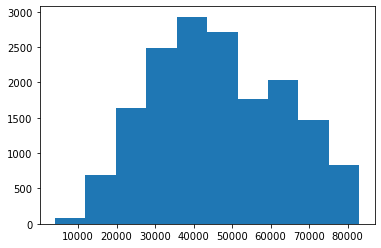

In [639]:
#Binning for annual_inc
plt.hist(loanData.annual_inc)
plt.show()

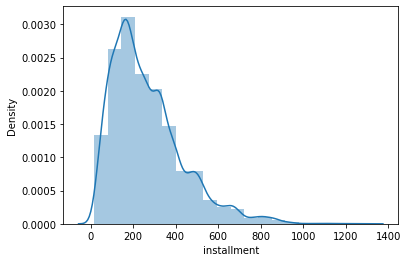

In [640]:
#Binning for installment

sbn.distplot(loanData.installment, bins=20)
plt.show()

In [641]:
# Check outliers for loanVsIncomeRatio
loanData.loanVsIncomeRatio.describe()

count    16636.000000
mean         0.198590
std          0.117027
min          0.010000
25%          0.110000
50%          0.180000
75%          0.270000
max          0.830000
Name: loanVsIncomeRatio, dtype: float64

-  We think that higher the Loan Vs incomeRatio , there will be higher tendency of Borrower Defaulting the Loan.Let's check this.

In [642]:
fig = px.box(loanData, x='loan_status', y='loanVsIncomeRatio',color='loan_status')
fig.show()

-  We think that higher the value of unutilized loan amount, there will be higher tendency of Borrower Defaulting the Loan.Let's check this.

In [643]:
fig = px.box(loanDataSub, x='loan_status', y='loan_amnt_balance',color='loan_status')
fig.show()